In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **UNIVARIATE ANALYSIS**


**CATEGORICAL FEATURES(Sex,Smoker,Region)**

- **Sex:** Slightly more females than males.  
- **Smoker:** Fewer smokers than non-smokers.  
- **Region:** Distribution roughly balanced across regions.


/var/folders/sk/hnfg7tj14xl3d91yyvcfq20c0000gn/T/ipykernel_29044/2567504046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


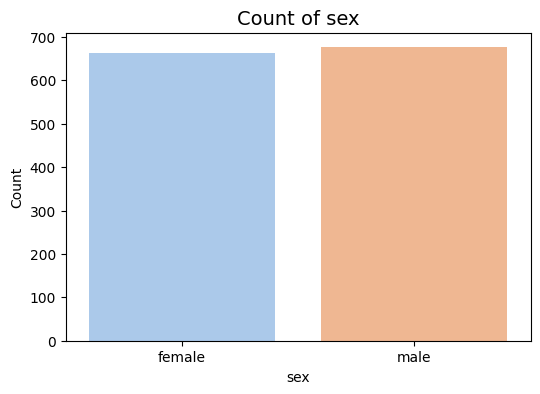

/var/folders/sk/hnfg7tj14xl3d91yyvcfq20c0000gn/T/ipykernel_29044/2567504046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


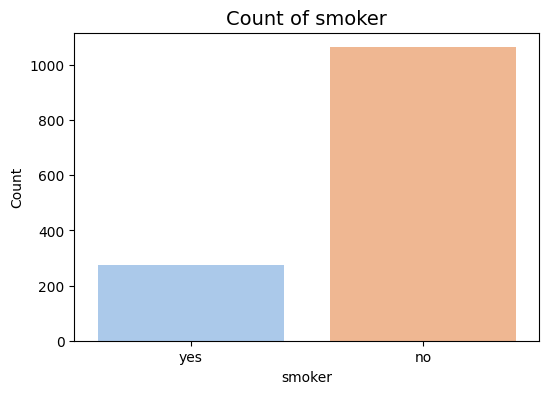

/var/folders/sk/hnfg7tj14xl3d91yyvcfq20c0000gn/T/ipykernel_29044/2567504046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


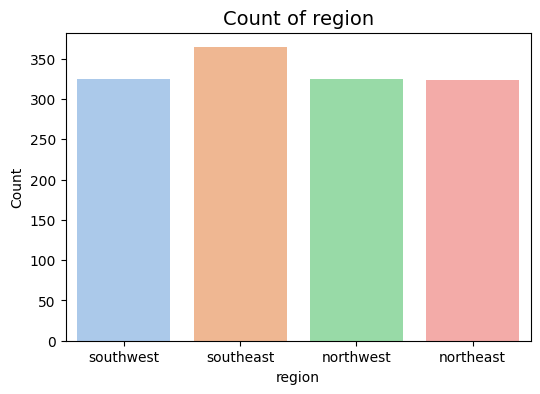

In [9]:
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

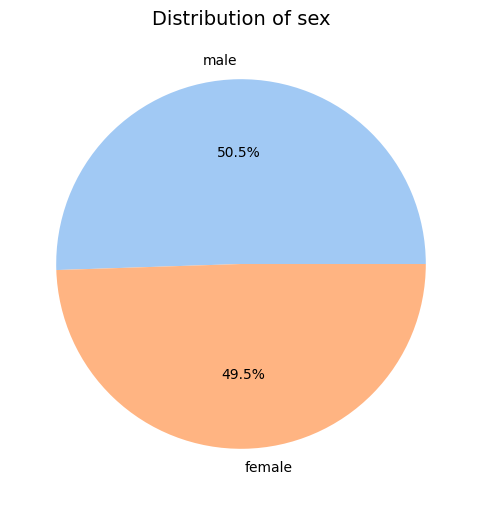

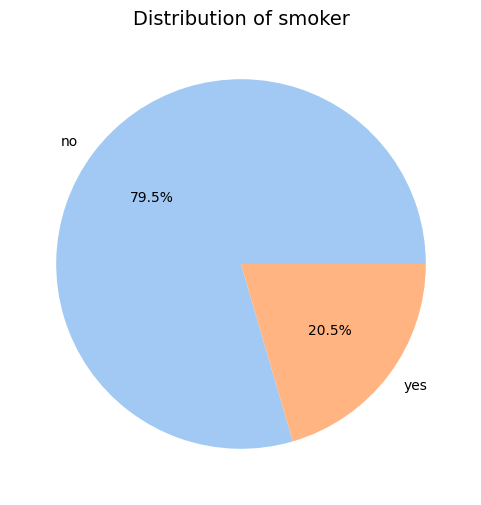

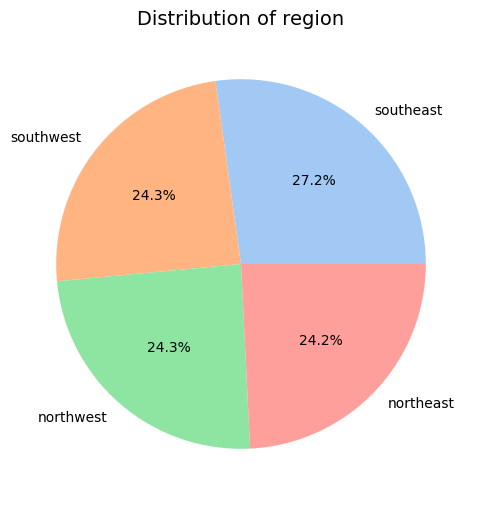

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('')
    plt.show()

**NUMERICAL FEATURES(age, bmi, children, charges)**

**Histogram**
- Shows distribution of a numerical feature.  
- Helps identify skewness, peaks, and spread.  
- KDE smooths the curve to see density patterns clearly.


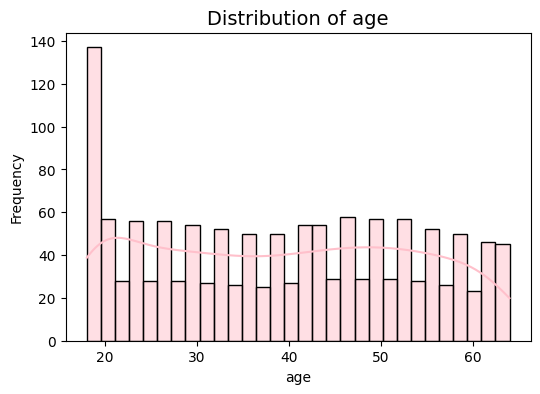

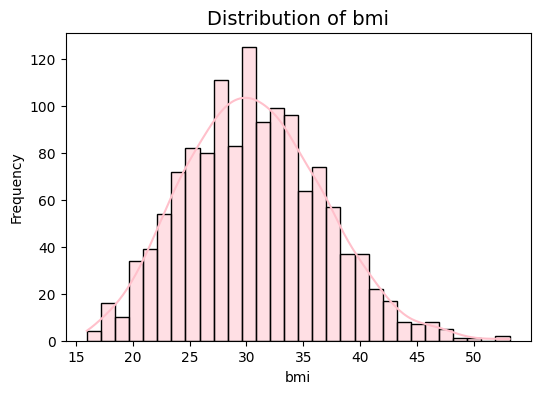

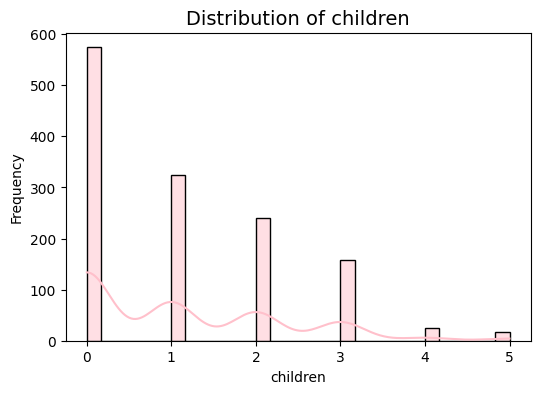

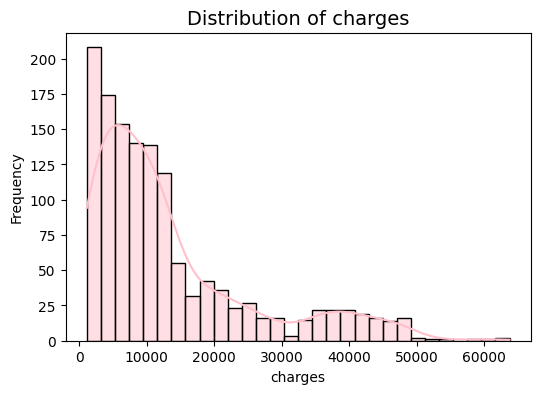

In [11]:
numerical_cols = ['age', 'bmi', 'children', 'charges']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='pink')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Boxplot**
- Shows median, quartiles, and range of a feature.  
- Highlights outliers and extreme values.  
- Useful for understanding variability in the data.


- **Age:** Mostly 18–40 years old.  
- **BMI:** Slightly right-skewed with some high outliers.  
- **Children:** Most have 0–2 children.  
- **Charges:** Highly skewed with some very high insurance costs, outliers may impact regression modeling.


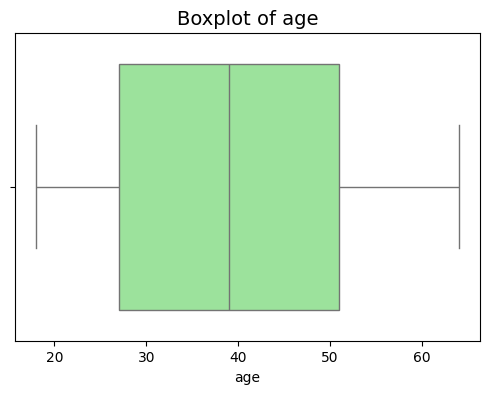

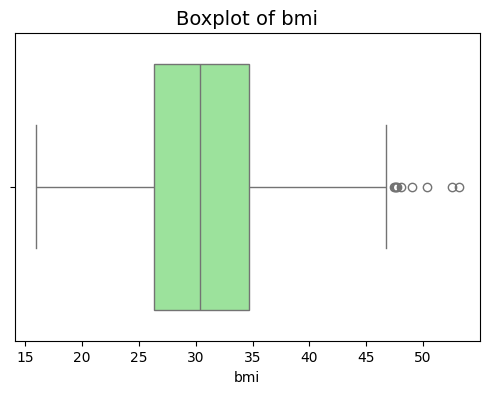

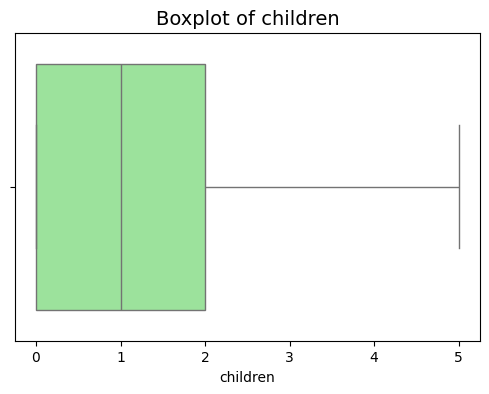

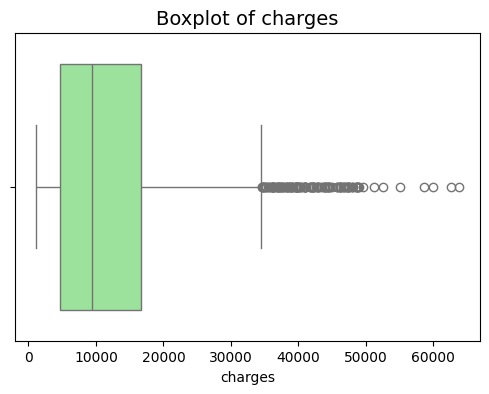

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.show()


# **BIVARIATE ANALYSIS**


**SCATTER PLOT(NUMERICAL-NUMERICAL)**

- Medical charges increase with age, especially for smokers.
- Smokers consistently incur higher charges across all age groups.
- Higher BMI values (larger points) are associated with higher charges.
- Gender shows minor variation compared to smoking status.


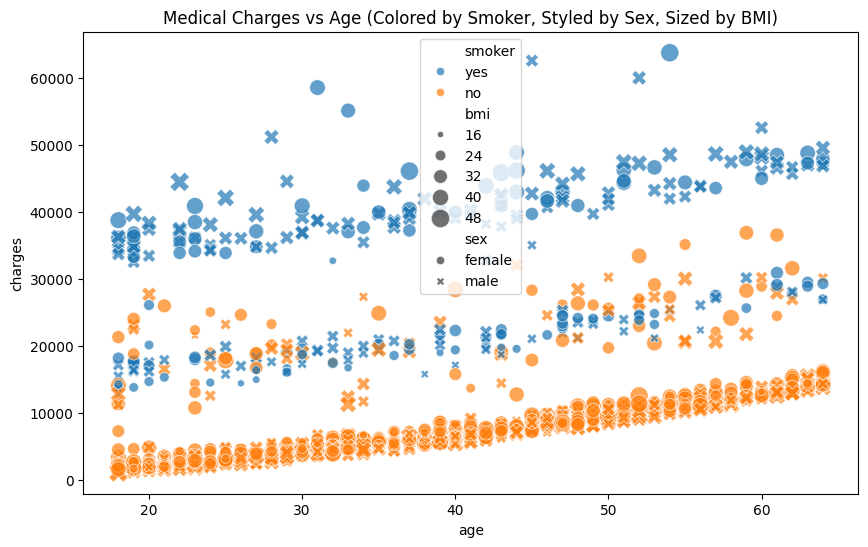

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    hue='smoker',      
    style='sex',         
    size='bmi',         
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Medical Charges vs Age (Colored by Smoker, Styled by Sex, Sized by BMI)")
plt.show()


**BAR PLOT(NUMERICAL-CATEGORICAL)**

- Smokers have significantly higher average medical charges than non-smokers.
- Within both groups, males show slightly higher average charges than females.
- Smoking status dominates gender in influencing medical costs.


<Axes: xlabel='smoker', ylabel='charges'>

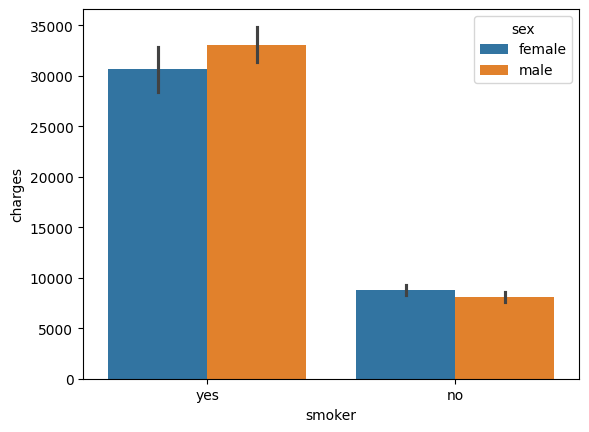

In [14]:
sns.barplot(data=df, x='smoker', y='charges', hue='sex')


**BOX PLOT(CATEGORICAL-NUMERICAL)**

- Smokers show a much higher median and wider spread of medical charges.
- Presence of extreme outliers among smokers.


<Axes: xlabel='smoker', ylabel='charges'>

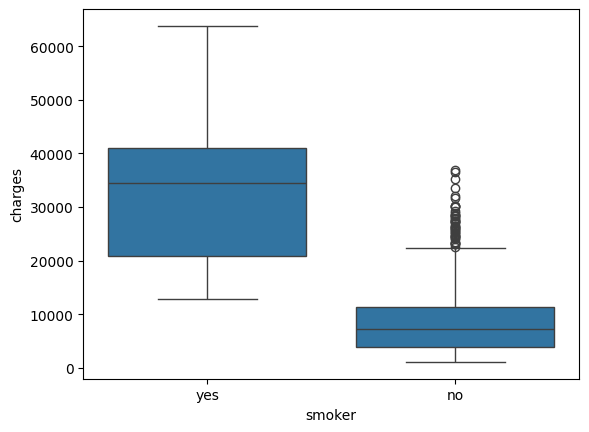

In [15]:
sns.boxplot(data=df, x='smoker', y='charges')

**DISTRIBUTION PLOT(NUMERICAL-CATEGORICAL)**

- Non-smokers show a right-skewed but lower charge distribution.
- Smokers have a much heavier tail indicating higher costs.


<Axes: xlabel='charges', ylabel='Count'>

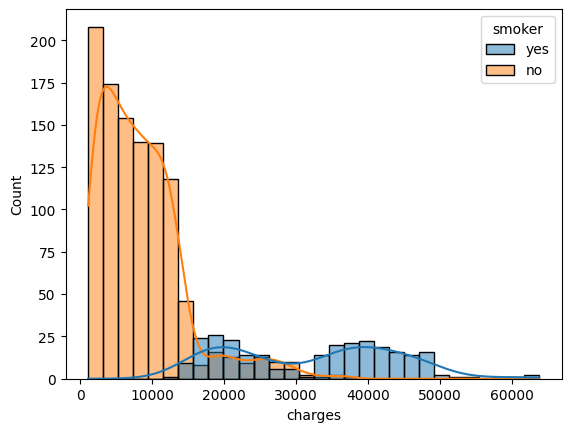

In [16]:
sns.histplot(data=df, x='charges', hue='smoker', kde=True)


**HEATMAP(NUMERICAL-NUMERICAL)**

*Label Encoding*

- Categorical variables are encoded separately.
- The correlation analysis confirms that lifestyle-related factors such as smoking and health indicators like age and BMI have a stronger impact on insurance charges compared to demographic factors such as gender, region, or number of children.


In [18]:
df_encoded = df.copy()

df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['smoker'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes


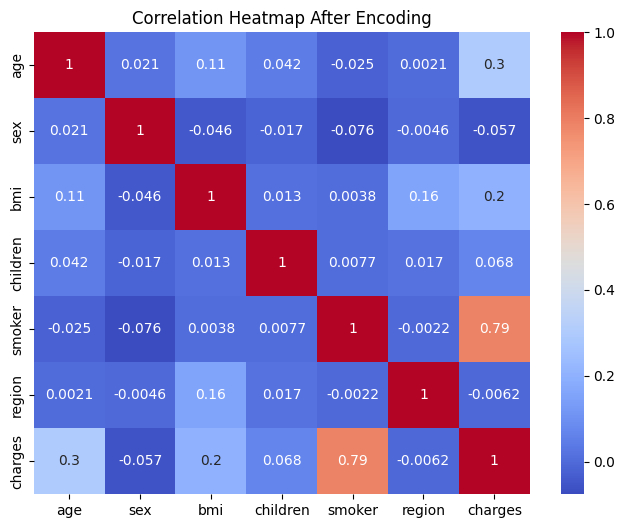

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap After Encoding")
plt.show()



**PAIR PLOT**

- Pairplot provides a combined view of distributions and pairwise relationships between features.
- Clear separation is observed between smokers and non-smokers, especially in relation to medical charges.
- Age and BMI show visible positive trends with charges.
- Children shows weak relationship with charges.


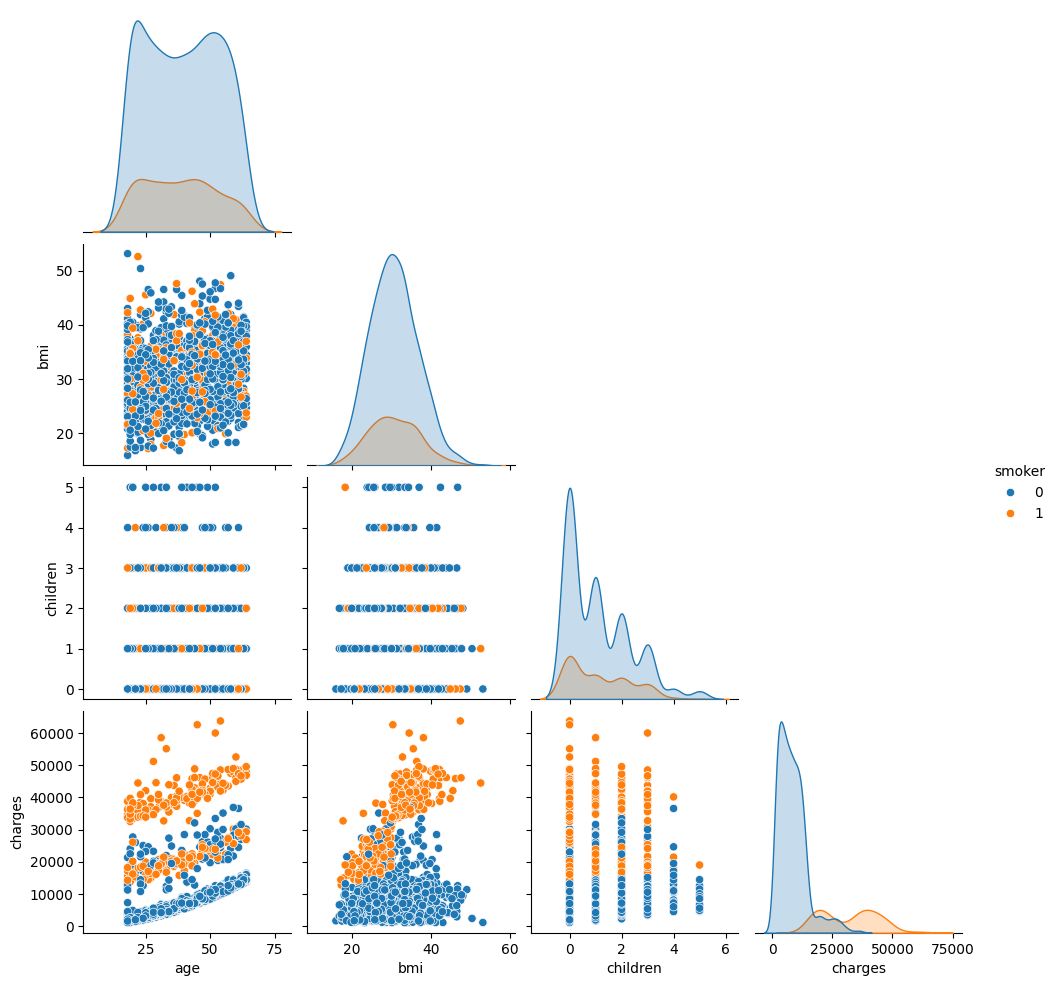

In [ ]:
pair_cols = ['age', 'bmi', 'children', 'charges', 'smoker']
sns.pairplot(
    df_encoded[pair_cols],
    hue='smoker',
    diag_kind='kde',
    corner=True
)
plt.show()